In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from planar_utils import *
from test_cases import *

%matplotlib inline
np.random.seed(2)

In [2]:
## Load in data
X, Y = load_planar_dataset()

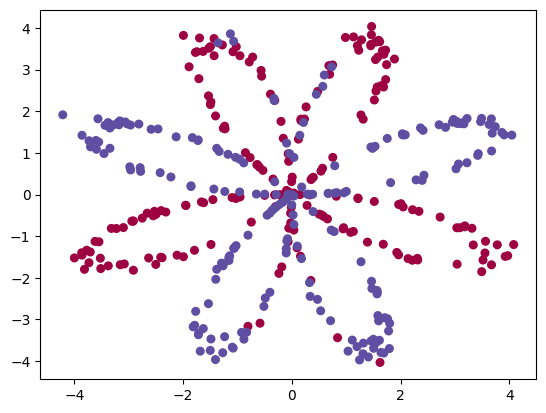

In [3]:
## Visualize data
plt.scatter(X[0,:], X[1,:], c=Y, s=30, cmap=plt.cm.Spectral);

/Users/Joann/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


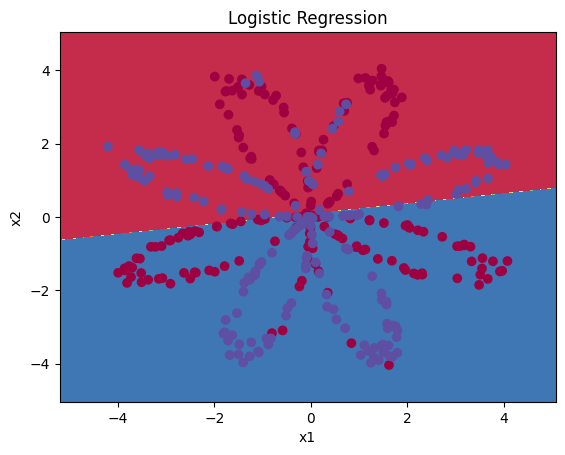

In [4]:
## Use built-n sklearn linear model for simple logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title('Logistic Regression')

logistic_pred = clf.predict(X.T)

In [5]:
accuracy = float(np.dot(Y, logistic_pred) + np.dot(1-Y, 1-logistic_pred)) / Y.shape[1]
print('Prediction accuracy: {}%'.format(accuracy))

Prediction accuracy: 0.47%


In [6]:
## Use a neural network with one hidden layer

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(2)
    W1 = np.random.randn(hidden_size, input_size)*0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size)*0.01
    b2 = np.zeros((output_size, 1))

    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2': b2}

    return parameters

In [7]:
parameters = initialize_parameters(2, 4, 1)
print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [8]:
def forward(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    z1 = np.dot(W1, X) + b1
    A1 = np.tanh(z1)
    z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(z2)

    cache = {'Z1':z1, 'A1':A1, 'Z2':z2, 'A2':A2}

    return A2, cache

In [9]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [10]:
def compute_cost(A2, Y):
    size = Y.shape[1]

    log_prob = np.dot(Y, np.log(A2).T) + np.dot(1-Y, np.log(1-A2).T)
    cost = np.float64(-log_prob / size)
    cost = np.squeeze(cost)

    return cost

In [11]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6929198937761266


In [12]:
def backward(X, Y, cache, parameters):
    size = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    ## Calculate dW1, db1, dW2, db2
    dz2 = A2 - Y
    dW2 = np.dot(dz2, A1.T) / size
    db2 = np.sum(dz2, axis=1, keepdims=True) / size
    dz1 = np.dot(W2.T, dz2) * (1-np.power(A1, 2))
    dW1 = np.dot(dz1, X.T) / size
    db1 = np.sum(dz1, axis=1, keepdims=True) / size

    grads = {'dW1':dW1, 'db1': db1, 'dW2':dW2, 'db2':db2}

    return grads

In [13]:
def update_params(parameters, grads, lr=1.0):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2

    parameters = {'W1':W1, 'b1': b1, 'W2':W2, 'b2':b2}

    return parameters

In [14]:
## Integrate all parts into nn_model()

def nn_model(X, Y, hidden_size, num_iter=10000, print_cost=False):
    np.random.seed(3)
    input_size = X.shape[0]
    output_size = Y.shape[0]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for i in range(num_iter):
        A2, cache = forward(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward(X, Y, cache, parameters)
        parameters = update_params(parameters, grads)

        if print_cost and i%1000 == 0:
            print('Cost after iter_%i: %f'%(i, cost))

    return parameters

In [15]:
def predict(X, parameters):
    A2, _ = forward(X, parameters)
    pred = (A2 > 0.5)

    return pred

In [16]:
parameters, X_assess = predict_test_case()

predictions = predict(X_assess, parameters)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iter_0: 0.693048
Cost after iter_1000: 0.292290
Cost after iter_2000: 0.276357
Cost after iter_3000: 0.240835
Cost after iter_4000: 0.231060
Cost after iter_5000: 0.226024
Cost after iter_6000: 0.222677
Cost after iter_7000: 0.220185
Cost after iter_8000: 0.218208
Cost after iter_9000: 0.216588


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

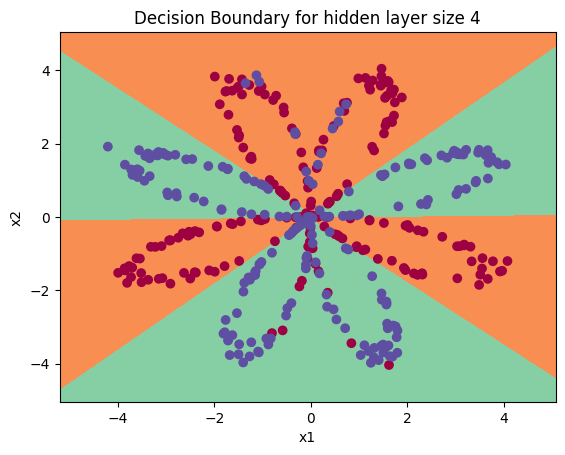

In [17]:
parameters = nn_model(X, Y, hidden_size=4, num_iter=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y)
plt.title('Decision Boundary for hidden layer size ' + str(4))

In [18]:
pred = predict(X, parameters)
print('Accuracy: {}'.format((np.dot(Y, pred.T)+np.dot(1-Y, 1-pred.T))/float(Y.size)))

Accuracy: [[0.9075]]


Accuracy for 1 hidden layers: 0.6725
Accuracy for 2 hidden layers: 0.67
Accuracy for 3 hidden layers: 0.9075
Accuracy for 4 hidden layers: 0.905
Accuracy for 5 hidden layers: 0.91
Accuracy for 10 hidden layers: 0.9075
Accuracy for 20 hidden layers: 0.91


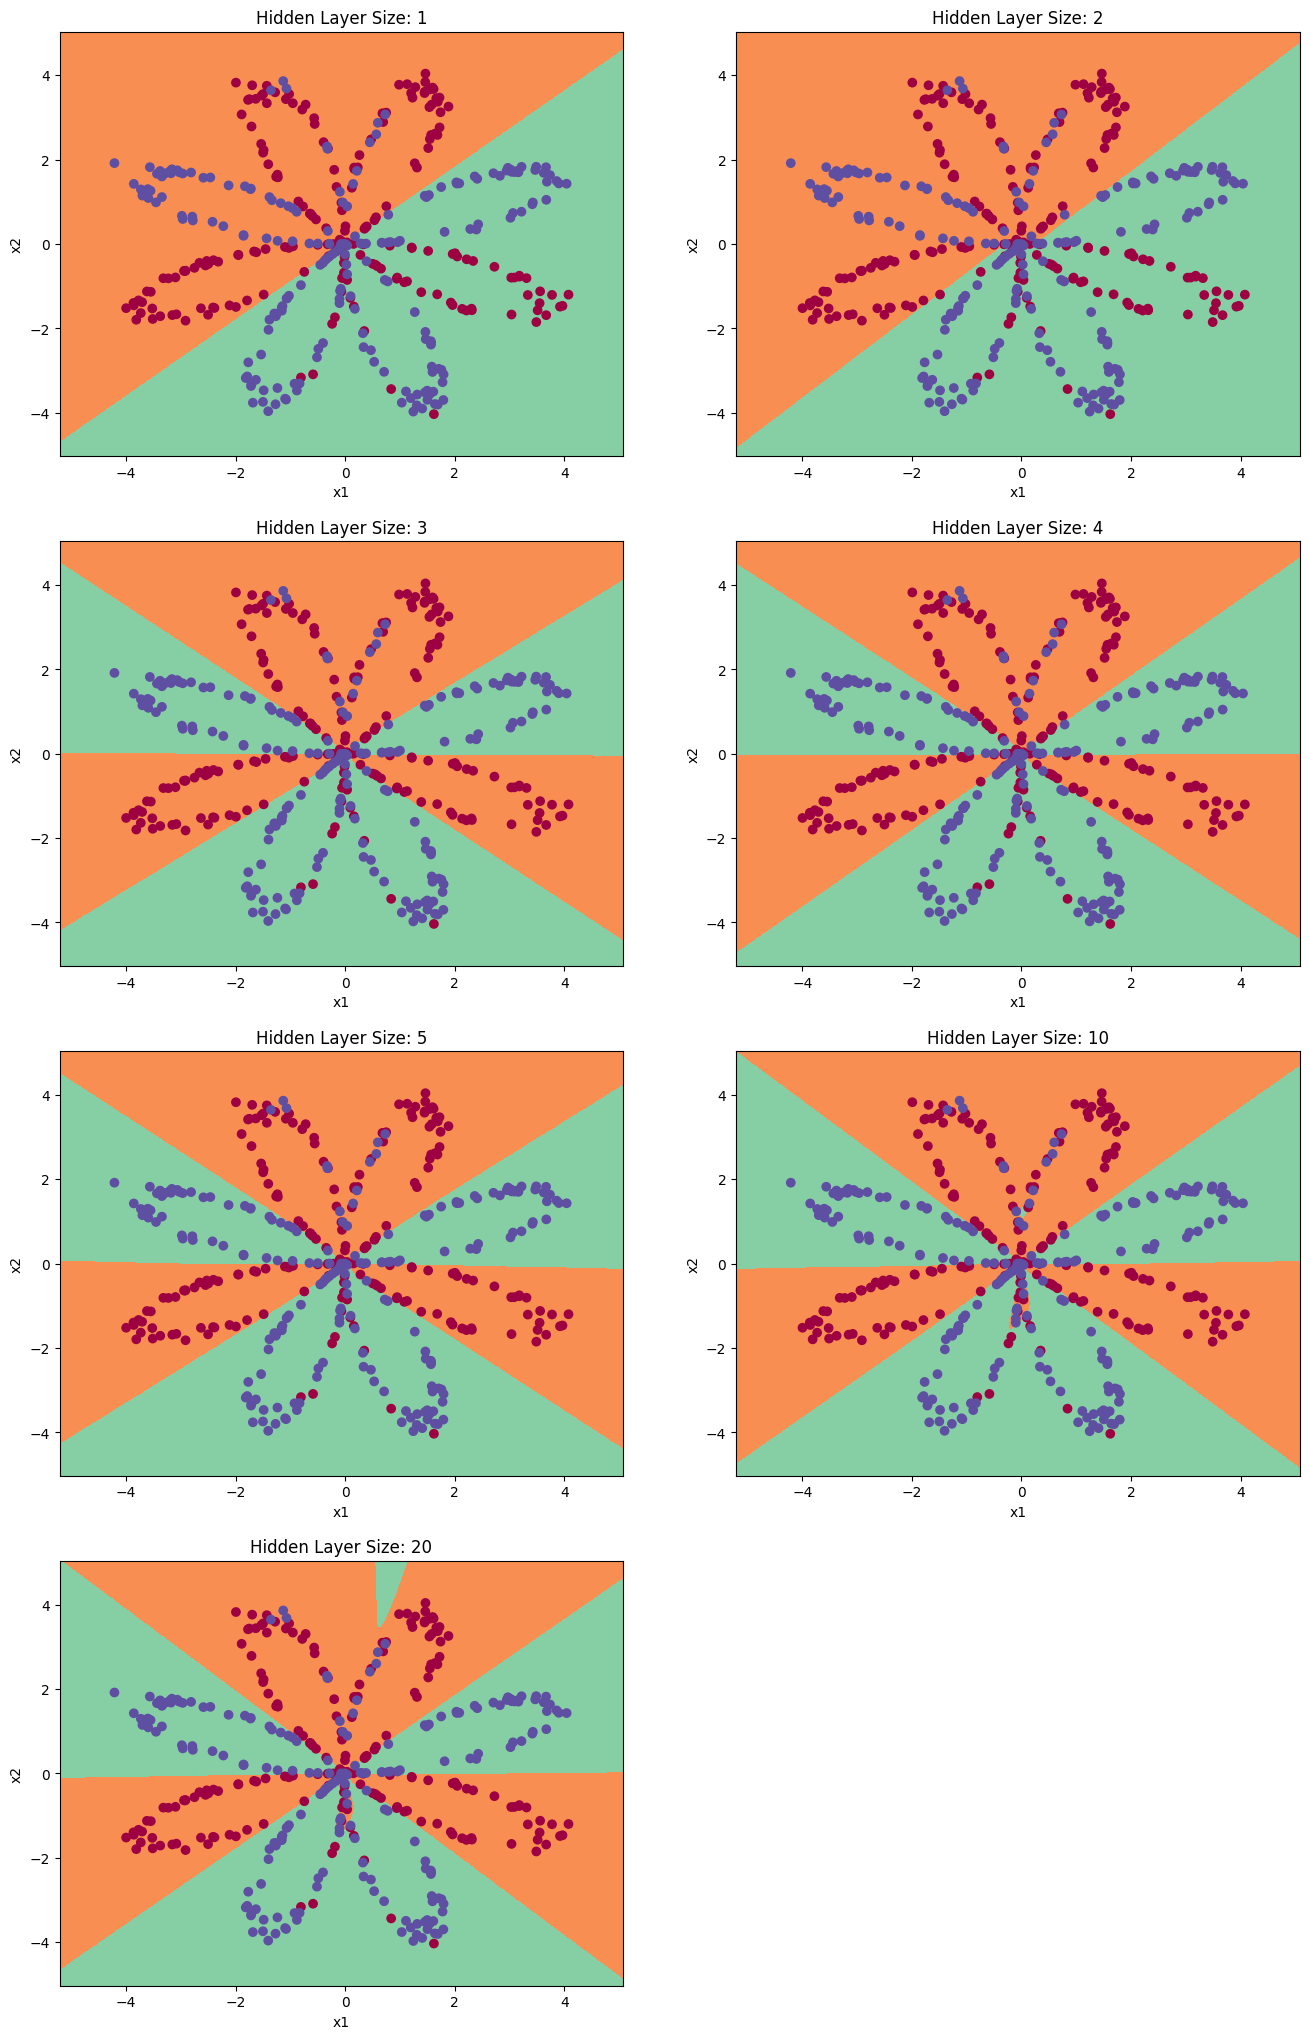

In [31]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1,2,3,4,5,10,20]
for i, hidden_size in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer Size: '+str(hidden_size))
    parameters = nn_model(X, Y, hidden_size, num_iter=5000)
    plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y)
    pred = predict(X, parameters)
    accuracy = float((np.dot(Y, pred.T)+np.dot(1-Y, 1-pred.T))/float(Y.size))
    print('Accuracy for {} hidden layers: {}'.format(hidden_size, accuracy))
plt.show()